<h1 align="center">Advanced Image Processing and Analysis</h1>
<h3 align="center">ECE 4438B/ECE 9022/ECE 9202B/BIOMED 9519B/BIOPHYS 9519B/CAMI 9519B</h3>
<h4 align="center"><a href="mailto:echen29@uwo.ca?subject=Day Day 27: Registration Errors"> Elvis Chen, PhD, LL</a></h4>
<h4 align="center">Day 27, April 08, 2019</h4>

<h1 align="center"> Registration Errors, Terminology and Interpretation </h1>

Registration is defined as the estimation of a geometric transformation aligning objects such that the distance between corresponding points on these objects is minimized, bringing the objects into alignment. We studied the least-squared solution for Procrustean Registration previously (Day 9). 

In the context of neurosurgery, as an example, artificual (radio-opaque) landmarks are used as the basis for point-based registration. 

<img src="radioopaque_landmarks.png" style="width:300px"/>
Image above is a photograph of artificial landmarks, constructed from hollow plastic cylinders (inside diameter=7mm, inside height=5mm), filled with an aqueous solution mixture of iothalamate meglumine and gadopentetate dimeglumine. 

<img src="skull_landmarks.png" style="width:300px"/>
They are rigidly attached to the skull,

<img src="CT_MR_landmarks.png" style="width:300px"/>
Appearance of these landmarks in CT (left), T1-weighted (middle) and T2-weighted (right) MR. (image courtesy of paper by Maurer et al [1])

During an image-guided interventions, these landmarks can be **digitized** using a spatial measurement device (i.e. GPS for surgery) and register medical imaging into the patient's physical location. Given two sets of measurements (e.g. physical fiducial location measured in the operating room, $x_i$, and corresponding fiducial location segmented from CT, $y_i$), the Procrustean registration solves for the rigid-body transformation that minimizes the Fiducial Registration error (FRE):

$
FRE^2 = \frac{1}{N} \sum_{i=1}^N |R x_i + t - y_i|^2
$

where the vector $FRE_i = R x_i+t-y_1$ is the residual displacement error between the registered poinx $x_i$ and its corresponding point $y_i$.

Below is an example of GPS for surgery: this is an **surgical navigational system** with mixed-reality. Both the mixed-reality head-mounted display, ultrasound transducer, surgical needle, and patient anatomy (spine) are spatially tracked and registered (**all** via point-based registrations) into a common coordinate system.

Simply put, in this mixed-reality system, the clinicians as an *x-ray* vision to see through anatomy through medical imaging.

In [1]:
%%HTML
<div align="middle">
<video width="100%" controls>
      <source src="VR_HMD_demo.mp4" type="video/mp4">
</video></div>

Because point-based registration are the basis for many calibration and registration problems in computer-assisted interventions, it is worth while to understand the intricate details of it so we can achieve best (clinically) possible accuracy.

Because the location of these landmarks need to be determined (digitized) in both the physical space (patient) and imaging (CT/MR), how well one can localize them becomes the limiting factor of achievable accuracy.

For example, if the radio-opaque landmarks are not spherical/symmetrical, or its appearance in images is not uniform, then determining its centroid through segmentation may have error.

When working with point-based registration algorithms we have three types of errors associated with our points (originally defined in [1]):  

**Fiducial Localization Error (FLE)**: The error in determining the location of a point which is used to estimate the transformation. The most widely used FLE model is that of a zero mean Gaussian with independent, identically distributed errors. The figure below illustrates the various possible fiducial localization errors:

<img src="fle.svg" style="width:600px"/><br><br>

**Fiducial Registration Error (FRE)**: The error of the fiducial markers following registration, $\|T(\mathbf{p_f}) - \mathbf{p_m}\|$ where $T$ is the estimated transformation and the points $\mathbf{p_f},\;\mathbf{p_m}$ were used to estimate $T$. 

**Target Registration Error (TRE)**: The error of the target fiducial markers following registration,$\|T(\mathbf{p_f}) - \mathbf{p_m}\|$ where $T$ is the estimated transformation and the points $\mathbf{p_f},\;\mathbf{p_m}$ were **not** used to estimate $T$. 


In a registration problem, FRE is typically the metric readily available to use (e.g. output of a registration problem). For a while (pre-2009) in the literature, researcher has always reported FRE as a measure of fitness for a registration. As it turns out, as shown by Fitzpatrick in 2009 [2], FRE and TRE are uncorrelated:
* small FRE does not imply good registration/small TRE, nor
* large FRE does not imply bad registration/large TRE:

<img src="TREvsFRE.png" style="width:600px"/>
Using the figure above as an example: (a) image space showing three fiducial (dotted circles) and a target, (b) physical space showing a fiducial localization errors that can be corrected exactly by clockwise rotation about the "full's eye". In this case, TRE is large, but FRE is *zero*, and (c) Physical space showing a set of fiducial localization that cannot be corrected by rigid transformation (for example, they are scaled about the target). In this case, FRE is large, but TRE is zero.

Things to remember:
1. TRE is the only quantity of interest, but in most cases we can only estimate its distribution.
2. FRE should never be used as a surrogate for TRE as the TRE for a specific registration is uncorrelated with its FRE [2]. 
3. TRE is spatially varying.
4. A good TRE is dependent on using a good fiducial configuration [3].
5. The least squares solution to paired-point registration is sensitive to outliers.


[1] "[Registration of Head Volume Images Using Implantable Fiducial Markers](https://www.ncbi.nlm.nih.gov/pubmed/9263002)", C. R. Maurer Jr. et al., *IEEE Trans Med Imaging*, 16(4):447-462, 1997.

[2] "[Fiducial registration error and target registration error are uncorrelated](http://spie.org/Publications/Proceedings/Paper/10.1117/12.813601)", J. Michael Fitzpatrick, *SPIE Medical Imaging: Visualization, Image-Guided Procedures, and Modeling*, 7261:1–12, 2009.

[3] "[Fiducial point placement and the accuracy of point-based, rigid body registration](https://www.ncbi.nlm.nih.gov/pubmed/11322441)", J. B. West et al., *Neurosurgery*, 48(4):810-816, 2001.

If the FLE is zer-mean, independent, isotropic, identical, and normally distributed, Fitzpatrick [2] showed that the expected value of TRE at a given localion $r$ is related to FLE:

$<TRE^2(r)> = \frac{1}{N}(1+\frac{1}{3} \sum_{k=1}^3 \frac{d^2_k}{f^2_k})<FLE^2>$

where $N$ is the number of registration fiducial, $d_k$ is the distance from the target $r$ from the principal axis $k$ of the noise-free marker, $f^2_k$ is the mean of the squared distances of the fiducial from axis $k$, and $<FLE^2> is the expected value of the squared magnitude of FLE.

<img src="eqnTRE.png" style="width:600px"/><br><br>

This equation concisely describes the behavior of the magnitude of TRE:
* TRE magnitude is propotional to the standard deviation of FLE,
* inversely proportional to the square root of the number of registration fiducial,
* minimized at the centroid of the markers,
* and the isocontours of TRE are ellipsoidal.

Based on these observations, West el al. [3] proposed the following guidelines when placing anatomical landmarks on patient for fiducial configurations:
* avoid collinear fiducial marker configuration,
* the center of mass of fiducial configuration should be as close to the target as possible (i.e. tumor is the target)
* keep the fiducial landmarks as far from each other as possible, and
* use as many fiducial markers as possible, although there is a diminishing return after 5 or 6 markers are used.

In [9]:
import SimpleITK as sitk
import numpy as np
import copy
%matplotlib nbagg
from gui import PairedPointDataManipulation, display_errors
import matplotlib.pyplot as plt
from registration_utilities import registration_errors

## FLE, FRE, TRE empirical experimentation

In the following cell you will use a user interface to experiment with the various concepts associated with FLE, FRE, and TRE. 

### Interacting with the GUI
1. Change the mode and interact directly with the figure:
    * Edit: Add pairs of fiducial markers with a left click and pairs of target markers with a right click.
        * Markers can only be added prior to any manipulation (translation/rotation/noise/bias...)
    * Translate: right-mouse button down + drag, anywhere in the figure.
    * Rotate: right-mouse button down + drag, anywhere in the figure, will rotate the fiducials around their centroid  
      (marked by a blue dot).
2. Buttons:
    * Clear Fiducials/Targets: Removes all fiducial/target marker pairs.
    * Reset: Moves all marker pairs to the original locations.
    * Noise: Add noise to the fiducial markers.
    * Bias (FRE<TRE): Add bias to all fiducial markers so that FRE<TRE (move all markers in the same direction).
    * Bias (FRE>TRE): Add bias to all fiducial markers so that FRE>TRE (move half of the markers in one direction and  
      the other half in the opposite direction).
    * Register: Align the two point sets using the paired fiducials. 

Marker glyphs:
* Light red plus: moving fiducials
* Dark red x: fixed fiducials
* Light green circle: moving targets
* Dark green square: fixed fiducials

<IPython.core.display.Javascript object>


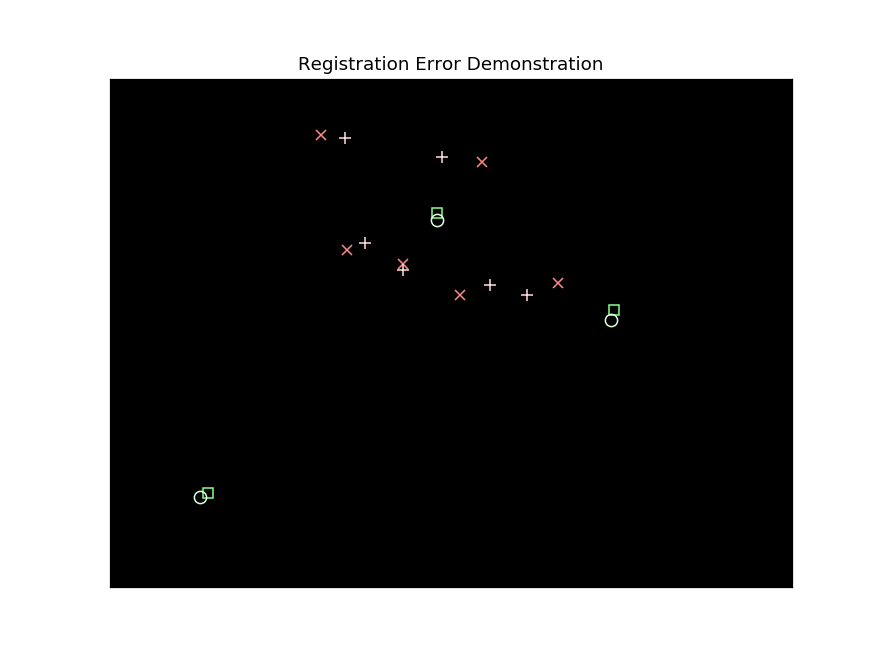

In [10]:
manipulation_interface = PairedPointDataManipulation(sitk.Euler2DTransform())

## Sensitivity to outliers

The least-squares solutions to the paired-point registration task used by the SimpleITK ``LandmarkBasedTransformInitializer`` method are optimal under the assumption of isotropic homogeneous zero mean Gaussian noise. They will readily fail in the presence of outliers (breakdown point is 0, a single outlier can cause arbitrarily large errors). 

The GUI above allows you to observe this qualitatively. In the following code cells we illustrate this quantitatively. 

In [13]:
ideal_fixed_fiducials = [[23.768817532447077, 60.082971482049849], [29.736559467930949, 68.740980140058511],
                   [37.639785274382561, 68.524529923608299], [41.994623984059984, 59.000720399798773]]
ideal_fixed_targets = [[32.317204629221266, 60.732322131400501], [29.413978822769653, 56.403317802396167]]
ideal_moving_fiducials = [[76.77857043206542, 30.557710579173616], [86.1401622129338, 25.76859196933914],
                    [86.95501792478755, 17.904506579872375], [78.07960498849866, 12.346214284259808]]
ideal_moving_targets = [[78.53588814928511, 22.166738486331596], [73.86559697098288, 24.481339720595585]]

Mean FLE 0.000000	 STD FLE 0.000000	 Min FLE 0.000000	 Max FLE 0.000000
Mean FRE 0.000000	 STD FRE 0.000000	 Min FRE 0.000000	 Max FRE 0.000000
Mean TRE 0.000000	 STD TRE 0.000000	 Min TRE 0.000000	 Max TRE 0.000000


<IPython.core.display.Javascript object>


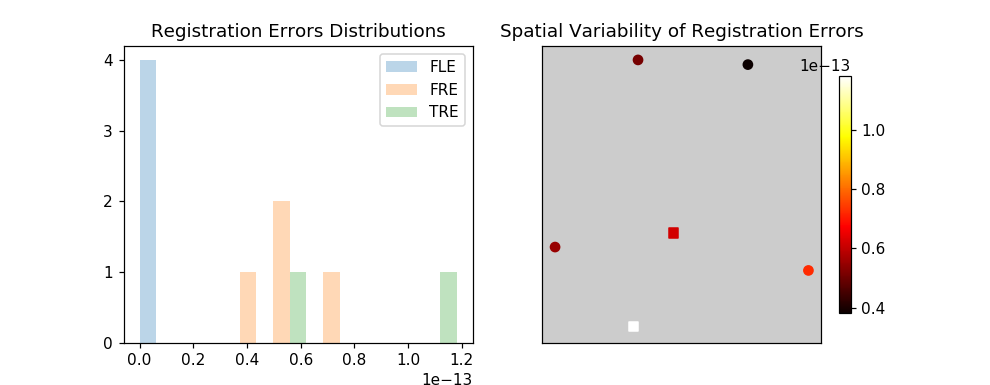

Mean FLE 3.535534	 STD FLE 6.123724	 Min FLE 0.000000	 Max FLE 14.142136
Mean FRE 4.728107	 STD FRE 3.228956	 Min FRE 0.295987	 Max FRE 9.238421
Mean TRE 2.452495	 STD TRE 0.388129	 Min TRE 2.064366	 Max TRE 2.840623


<IPython.core.display.Javascript object>


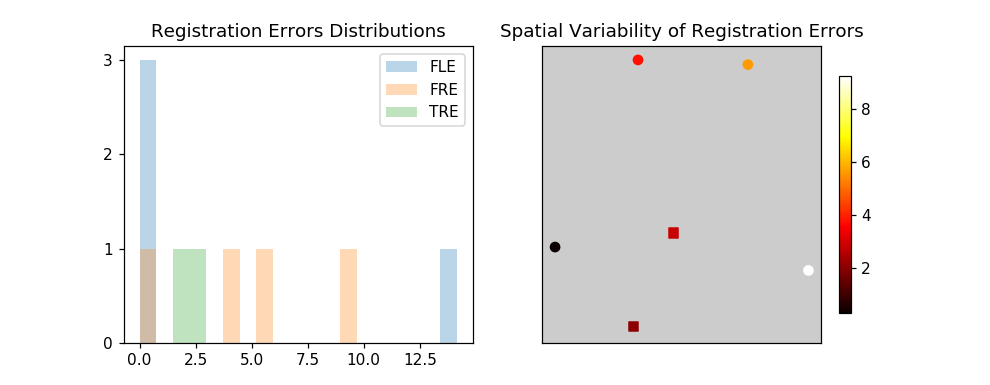

In [15]:
# Registration with perfect data (no noise or outliers) 
fixed_fiducials = copy.deepcopy(ideal_fixed_fiducials)
fixed_targets = copy.deepcopy(ideal_fixed_targets)
moving_fiducials = copy.deepcopy(ideal_moving_fiducials)
moving_targets = copy.deepcopy(ideal_moving_targets)

# Flatten the point lists, SimpleITK expects a single list/tuple with coordinates (x1,y1,...xn,yn)
fixed_fiducials_flat = [c for p in fixed_fiducials for c in p]
moving_fiducials_flat = [c for p in moving_fiducials for c in p]

transform = sitk.LandmarkBasedTransformInitializer(sitk.Euler2DTransform(), fixed_fiducials_flat, moving_fiducials_flat)

FRE_information = registration_errors(transform, fixed_fiducials, moving_fiducials)
TRE_information = registration_errors(transform, fixed_targets, moving_targets)
FLE_values = [0.0]*len(moving_fiducials)
FLE_information =  (np.mean(FLE_values), np.std(FLE_values), np.min(FLE_values), np.max(FLE_values), FLE_values) 

# pay attention to the scale, this plot is meaningless
display_errors(fixed_fiducials, fixed_targets, FLE_information, FRE_information, TRE_information, title="Ideal Input")

# Change fourth fiducial to an outlier and register
outlier_fiducial = [88.07960498849866, 22.34621428425981]
FLE_values[3] = np.sqrt((outlier_fiducial[0] - moving_fiducials[3][0])**2 + 
                        (outlier_fiducial[1] - moving_fiducials[3][1])**2)
moving_fiducials[3][0] = 88.07960498849866
moving_fiducials[3][1] = 22.34621428425981

moving_fiducials_flat = [c for p in moving_fiducials for c in p]

transform = sitk.LandmarkBasedTransformInitializer(sitk.Euler2DTransform(), fixed_fiducials_flat, moving_fiducials_flat)

FRE_information = registration_errors(transform, fixed_fiducials, moving_fiducials)
TRE_information = registration_errors(transform, fixed_targets, moving_targets)
FLE_information =  (np.mean(FLE_values), np.std(FLE_values), np.min(FLE_values), np.max(FLE_values), FLE_values) 
display_errors(fixed_fiducials, fixed_targets, FLE_information, FRE_information, TRE_information, title="Single Outlier")

## FRE is not a surrogate for TRE

In the next code cell we illustrate that FRE and TRE are not correlated. We first add the same fixed bias to 
all of the moving fiducials. This results in a large TRE, but the FRE remains zero. We then add a fixed bias to half of the moving fiducials and the negative of that bias to the other half. This results in a small TRE, but the FRE is large.

Mean FLE 6.363961	 STD FLE 0.000000	 Min FLE 6.363961	 Max FLE 6.363961
Mean FRE 0.000000	 STD FRE 0.000000	 Min FRE 0.000000	 Max FRE 0.000000
Mean TRE 6.363961	 STD TRE 0.000000	 Min TRE 6.363961	 Max TRE 6.363961


<IPython.core.display.Javascript object>


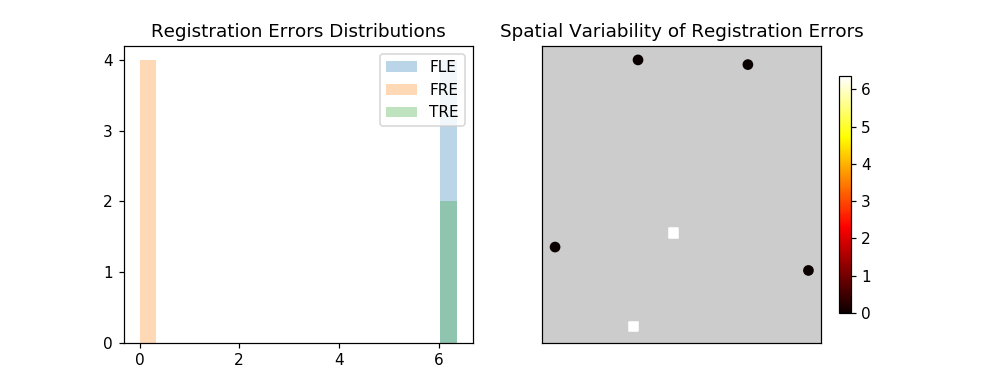

Mean FLE 6.363961	 STD FLE 0.000000	 Min FLE 6.363961	 Max FLE 6.363961
Mean FRE 6.163161	 STD FRE 0.837092	 Min FRE 4.939206	 Max FRE 7.285392
Mean TRE 0.898024	 STD TRE 0.379545	 Min TRE 0.518479	 Max TRE 1.277569


<IPython.core.display.Javascript object>


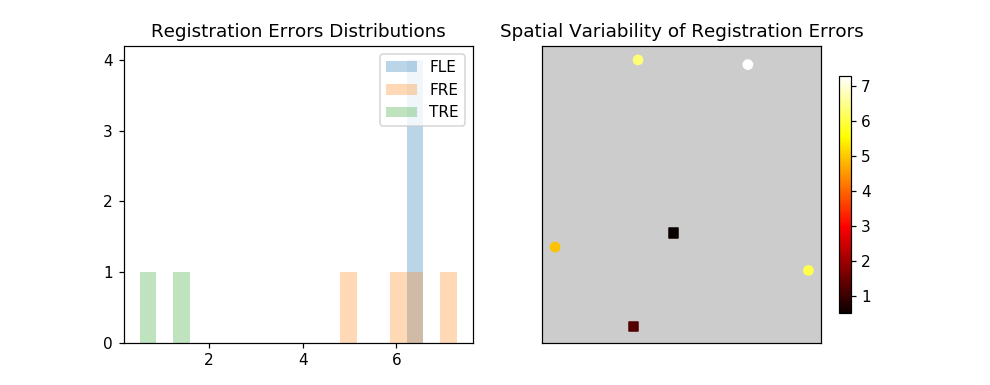

In [5]:
# Registration with same bias added to all points
fixed_fiducials = copy.deepcopy(ideal_fixed_fiducials)
fixed_targets = copy.deepcopy(ideal_fixed_targets)
moving_fiducials = copy.deepcopy(ideal_moving_fiducials)
bias_vector = [4.5, 4.5]
bias_fle = np.sqrt(bias_vector[0]**2 + bias_vector[1]**2)
for fiducial in moving_fiducials:
    fiducial[0] +=bias_vector[0]
    fiducial[1] +=bias_vector[1]
FLE_values = [bias_fle]*len(moving_fiducials)
moving_targets = copy.deepcopy(ideal_moving_targets)

# Flatten the point lists, SimpleITK expects a single list/tuple with coordinates (x1,y1,...xn,yn)
fixed_fiducials_flat = [c for p in fixed_fiducials for c in p]
moving_fiducials_flat = [c for p in moving_fiducials for c in p]

transform = sitk.LandmarkBasedTransformInitializer(sitk.Euler2DTransform(), fixed_fiducials_flat, moving_fiducials_flat)

FRE_information = registration_errors(transform, fixed_fiducials, moving_fiducials)
TRE_information = registration_errors(transform, fixed_targets, moving_targets)
FLE_information =  (np.mean(FLE_values), np.std(FLE_values), np.min(FLE_values), np.max(FLE_values), FLE_values) 
display_errors(fixed_fiducials, fixed_targets, FLE_information, FRE_information, TRE_information, title="FRE<TRE")

# Registration with bias in one direction for half the fiducials and in the opposite direction for the other half
moving_fiducials = copy.deepcopy(ideal_moving_fiducials)
pol = 1
for fiducial in moving_fiducials:
    fiducial[0] +=bias_vector[0]*pol
    fiducial[1] +=bias_vector[1]*pol
    pol*=-1.0
FLE_values = [bias_fle]*len(moving_fiducials)
moving_targets = copy.deepcopy(ideal_moving_targets)

# Flatten the point lists, SimpleITK expects a single list/tuple with coordinates (x1,y1,...xn,yn)
fixed_fiducials_flat = [c for p in fixed_fiducials for c in p]
moving_fiducials_flat = [c for p in moving_fiducials for c in p]

transform = sitk.LandmarkBasedTransformInitializer(sitk.Euler2DTransform(), fixed_fiducials_flat, moving_fiducials_flat)

FRE_information = registration_errors(transform, fixed_fiducials, moving_fiducials)
TRE_information = registration_errors(transform, fixed_targets, moving_targets)
FLE_information =  (np.mean(FLE_values), np.std(FLE_values), np.min(FLE_values), np.max(FLE_values), FLE_values) 
display_errors(fixed_fiducials, fixed_targets, FLE_information, FRE_information, TRE_information, title="FRE>TRE")

## Fiducial Configuration

Even when our model of the world is correct, no outliers and FLE is isotropic and homogeneous, the fiducial configuration
has a significant effect on the TRE. Ideally you want the targets to be at the centroid of your fiducial configuration.

This is illustrated in the code cell below. Translate, rotate and add noise to the fiducials, then register. The targets that are near the fiducials should have a better alignment than those far from the fiducials. 

Now, reset the setup. Where would you add two fiducials to improve the overall TRE? Experiment with various fiducial configurations.

<IPython.core.display.Javascript object>


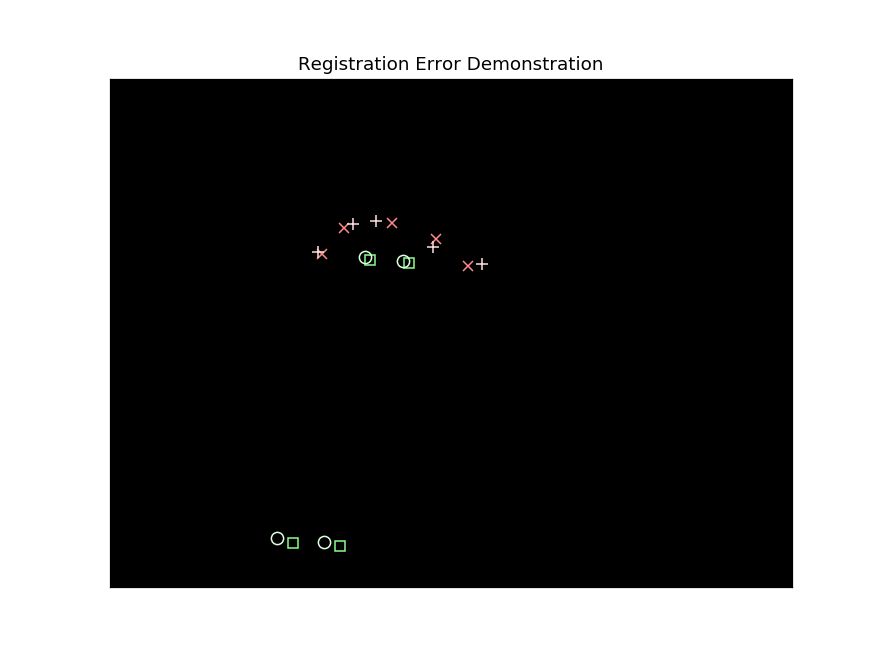

In [16]:
fiducials = [[31.026882048576109, 65.696247315510021], [34.252688500189009, 70.674602293864993], 
             [41.349462693737394, 71.756853376116084], [47.801075596963202, 68.510100129362826], 
             [52.47849495180192, 63.315294934557635]]
targets = [[38.123656242124497, 64.397546016808718], [43.768817532447073, 63.748195367458059], 
           [26.833333661479333, 8.7698403891030861], [33.768817532447073, 8.120489739752438]]
manipulation_interface = PairedPointDataManipulation(sitk.Euler2DTransform())
manipulation_interface.set_fiducials(fiducials)
manipulation_interface.set_targets(targets)

## FRE-TRE, and Occam's razor

When we perform registration, our goal is to minimize the Target Registration Error. In practice it needs to be below a problem specific threshold for the registration to be useful.

The target point(s) can be a single point or a region in space, and we want to minimize our registration error for this target. We go about this task by minimizing another quantity, in paired-point registration this is the FRE, in the case of intensity based registration we minimize an appropriate similarity metric. In both cases we expect that TRE is minimized indirectly.

This can easily lead us astray, down the path of **overfitting**. In our 2D case, instead of using a rigid transformation with **three degrees of freedom** we may be tempted to use an affine transformation with **six degrees of freedom**. By introducing these additional degrees of freedom we will likely improve the FRE, but what about TRE?   

In the cell below  you can qualitatively evaluate the effects of overfitting. Start by adding noise with no rotation or translation and then register. Switch to an affine transformation model and see how registration effects the fiducials and targets. You can then repeat this qualitative evaluation incorporating translation/rotation and noise. 

In this notebook we are working in an ideal setting, we know the appropriate transformation model is rigid. Unfortunately, this is often not the case. So which transformation model should you use? When presented with multiple competing hypotheses we select one using the principle of parsimony, often referred to as [Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor). Our choice is to select the simplest model that can explain our observations. 

**In the case of registration, the transformation model with the least degrees of freedom that reduces the TRE below the problem specific threshold.**

<IPython.core.display.Javascript object>


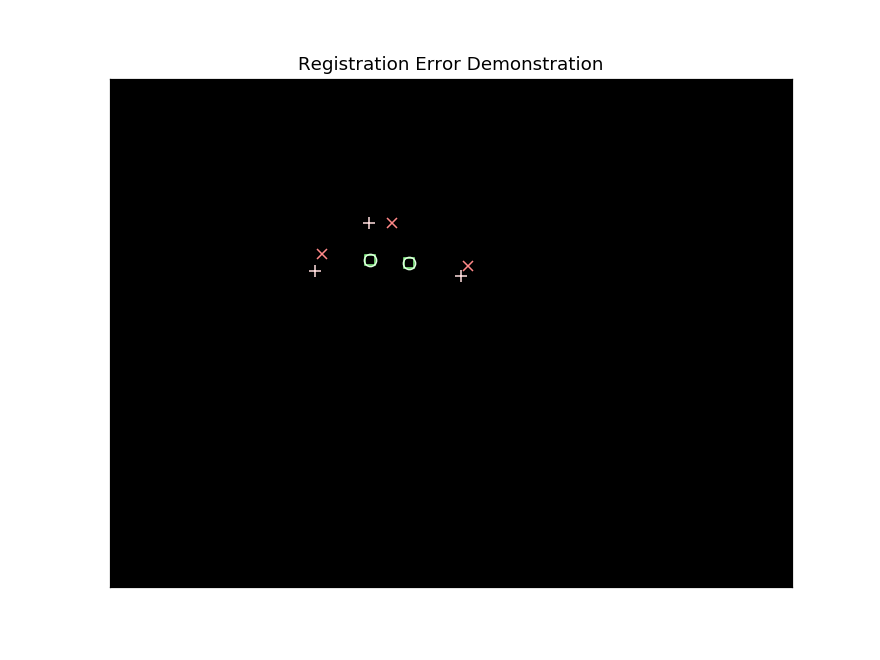

In [17]:
fiducials = [[31.026882048576109, 65.696247315510021], 
             [41.349462693737394, 71.756853376116084], 
             [52.47849495180192, 63.315294934557635]]

targets = [[38.123656242124497, 64.397546016808718], [43.768817532447073, 63.748195367458059]]
manipulation_interface = PairedPointDataManipulation(sitk.Euler2DTransform())
#manipulation_interface = PairedPointDataManipulation(sitk.AffineTransform(2))
manipulation_interface.set_fiducials(fiducials)
manipulation_interface.set_targets(targets)